In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_df= "data/mouse_drug_data.csv"
clinical_trial_data_df = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_df)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_df)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, how='outer', on='Mouse ID')
 
# Display the data table for preview
combined_data_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_data = combined_data_df.groupby(['Drug','Timepoint'], as_index=False) ["Tumor Volume (mm3)"].mean()
mean_tumor_data.count()

# Tumor Dataframe
tumor_mean_df = pd.DataFrame(data = mean_tumor_data)

#tumor_df.index.name = "Drug"

# Preview DataFrame
tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_stand_error_data = combined_data_df.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"].sem().reset_index()
                                               
# standard_error_data Dataframe
tumor_stand_error_df = pd.DataFrame(data = tumor_stand_error_data)

# Preview DataFrame
tumor_stand_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Mean Data Frame
new_tumor_mean_df = tumor_mean_df.pivot(index='Timepoint', values='Tumor Volume (mm3)', columns='Drug')

# Preview that Reformatting worked
new_tumor_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
# Minor Data Munging to Re-Format Standard Error Data Frame
new_tumor_stand_error_df =tumor_stand_error_df.pivot(index='Timepoint', values='Tumor Volume (mm3)', columns='Drug')

# Preview that Reformatting worked
new_tumor_stand_error_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [7]:
#Short list of drugs to analyze
short_tumor_mean_df = new_tumor_mean_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
short_tumor_mean_df

short_tumor_stand_df = new_tumor_stand_error_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
short_tumor_stand_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


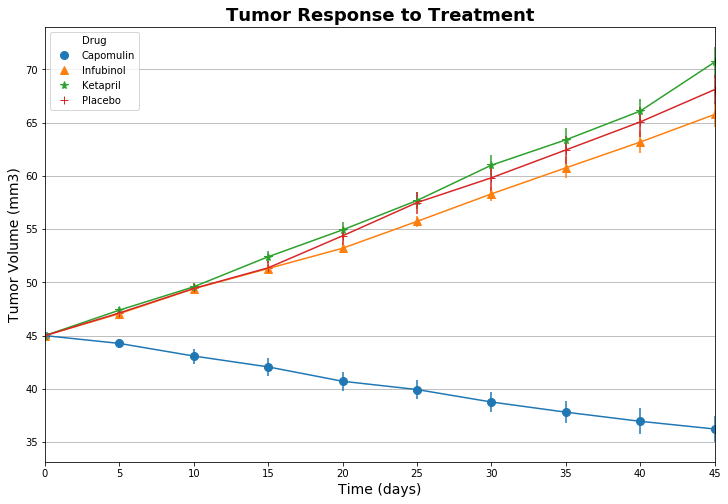

In [12]:
# Set x axis and tick locations
ax=short_tumor_mean_df.plot(yerr=short_tumor_stand_df, legend=False)
ax.set_prop_cycle(None)
short_tumor_mean_df.plot(figsize=(12,8), style=['o', '^', '*', '+'],  markersize=8, ax=ax)


# Set a Title and labels
plt.title("Tumor Response to Treatment", fontsize=18, fontweight="bold")
plt.xlabel("Time (days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.grid(axis="y")


# Save the Figure
plt.savefig("Images/Tumor_Reponse_2Treatment.png")

# Show the Figure
plt.show()

***Tumor Response to Treatment Analysis***

-According to results, there was tumor reduction when a mouse was treated with Capomulin, and there was a tumor increase when a mouse was treated with Infubinol, Kerapril, or Placebo. 

-It could be concluded that Capomulin was an effective drug to treat a tumor

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean_data = combined_data_df.groupby(['Drug','Timepoint'], as_index=False) ["Metastatic Sites"].mean()
meta_mean_data.count()

# Convert to DataFrame
meta_mean_df = pd.DataFrame(data = meta_mean_data)

# Preview DataFrame
meta_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_stand_error_data = combined_data_df.groupby(['Drug','Timepoint'])["Metastatic Sites"].sem().reset_index()
 
# standard_error_data Dataframe
meta_stand_error_df = pd.DataFrame(data = meta_stand_error_data)

# Preview DataFrame
meta_stand_error_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [15]:
# Minor Data Munging to Re-Format the Meta Data Frame
new_meta_mean_df = meta_mean_df.pivot(index='Timepoint', values='Metastatic Sites', columns='Drug')
# Preview that Reformatting worked
new_meta_mean_df

#Minor Data Munging to Re-Format the Standard Error Data Frame
new_meta_stand_error_df = meta_stand_error_df.pivot(index='Timepoint', values='Metastatic Sites', columns='Drug')
#Preview that Reformatting worked
new_meta_stand_error_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [16]:
#Short list of drugs to analyze
short_meta_mean_df = new_meta_mean_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
short_meta_mean_df

short_stand_meta_df = new_meta_stand_error_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
short_stand_meta_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


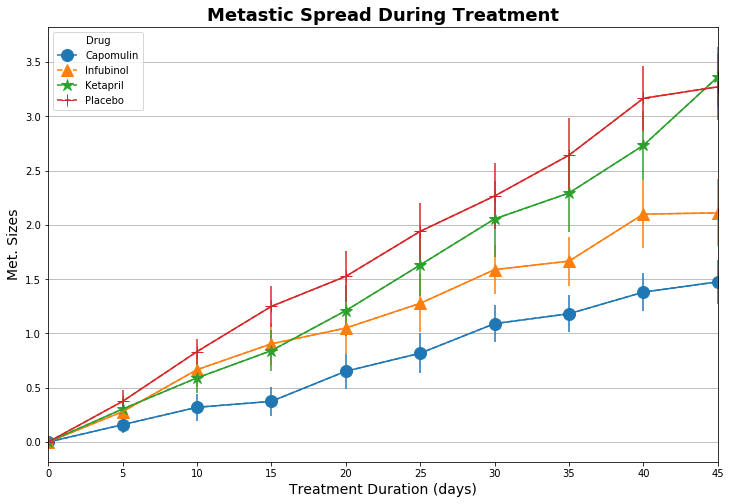

In [18]:
# Generate the Plot (with Error Bars)
# Set x axis and tick locations
ax=short_meta_mean_df.plot(yerr=short_stand_meta_df, legend=False)
ax.set_prop_cycle(None)
short_meta_mean_df.plot(figsize=(12,8), style=['o', '^', '*', '+'],linestyle = "--", markersize=12, ax=ax)

# Set a Title and labels
plt.title("Metastic Spread During Treatment", fontsize=18, fontweight="bold")
plt.xlabel("Treatment Duration (days)", fontsize=14)
plt.ylabel("Met. Sizes", fontsize=14)
plt.grid(axis="y")

# Save the Figure
plt.savefig("Images/MetasticSpreadDuringTreatment.png")

# Show the Figure
plt.show()


***Metastic Spread During Treatment Analysis***

-According to results, the metastic spread during treatment was higher when a mouse was treated with Ketapril and Placebo

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_data = combined_data_df.groupby(['Drug','Timepoint'], as_index=False) ["Mouse ID"].count()
mouse_data.count()

# Convert to DataFrame
mouse_data_df = pd.DataFrame(data = mouse_data)

# Preview DataFrame
mouse_data_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
# Minor Data Munging to Re-Format the Data Frames
new_mouse_data_df = mouse_data_df.pivot(index='Timepoint', values='Mouse ID', columns='Drug')

# Preview the Data Frame
new_mouse_data_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [21]:
#Short list of drugs to analyze and percentages
short_mouse_df = new_mouse_data_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

mouse_percentage_df=(100 * short_mouse_df /25)#.astype(str) + '%'
mouse_percentage_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


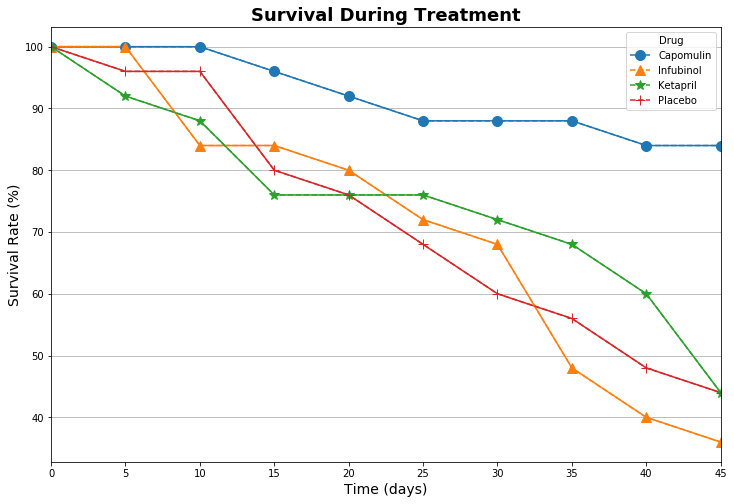

In [22]:
# Generate the Plot (Accounting for percentages)
ax=mouse_percentage_df.plot(legend=None)
ax.set_prop_cycle(None)

mouse_percentage_df.plot(figsize=(12,8), style=['o', '^', '*', '+'], linestyle = "--", markersize=10, ax=ax)

# Set a Title and labels
plt.title("Survival During Treatment", fontsize=18, fontweight="bold")
plt.xlabel("Time (days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)
plt.grid(axis="y")

# Save the Figure
plt.savefig("Images/SurvivalDuringTreatment.png")

# Show the Figure
plt.show()

***Survival During Treatment Analysis***

-According to survival trend, a mouse had a higher survival rate when treated with Capomulin, and a extremely low survival rate when treated with Infubinol


## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug
initialvolume= new_tumor_mean_df.iloc[0]
endvolume= new_tumor_mean_df.iloc[-1]
tumor_percent_change= 100* (endvolume-initialvolume)/initialvolume

# Display the data to confirm
tumor_percentage_change=tumor_percent_change.round(1)
tumor_percentage_change

Drug
Capomulin   -19.5
Ceftamin     42.5
Infubinol    46.1
Ketapril     57.0
Naftisol     53.9
Placebo      51.3
Propriva     47.2
Ramicane    -22.3
Stelasyn     52.1
Zoniferol    46.6
dtype: float64

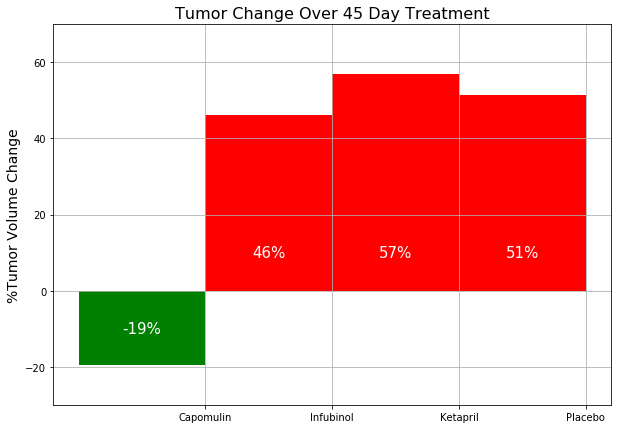

In [24]:
# Store all Relevant Percent Changes into a Tuple
tumor_percentage_change = (tumor_percentage_change["Capomulin"],
                               tumor_percentage_change["Infubinol"],
                               tumor_percentage_change["Ketapril"],
                               tumor_percentage_change["Placebo"])    
tumor_percentage_change

drugs_to_analyze=('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')
drugs_to_analyze

# Splice the data between passing and failing drugs
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(len(tumor_percentage_change))
width = 1
passingdrugs = ax.bar(index[0], tumor_percentage_change[0], width, color='green')
failingdrugs = ax.bar(index[1:], tumor_percentage_change[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
plt.ylabel("%Tumor Volume Change", fontsize=14)
plt.title("Tumor Change Over 45 Day Treatment", fontsize=16)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')) 
ax.set_xticks(index + 0.5)
ax.set_ylim([-30,70])
plt.grid()

# Call functions to implement the function calls
text1 = ax.text(0,-10,'-19%', ha="center", va="center", fontsize=15, color="white") 
text2 = ax.text(1,10,'46%', ha="center", va="center", fontsize=15, color="white")
text3 = ax.text(2,10,'57%', ha="center", va="center", fontsize=15, color="white")
text4 = ax.text(3,10,'51%', ha="center", va="center", fontsize=15, color="white")


# Save the Figure
plt.savefig("Images/Tumor_Change_Over_45day_Treatment.png")

# Show the Figure
fig.show()

